# **EMPLOYEE SALALRY PREDICTION**


---



This project aims to predict whether an employee earns more than 50k per year

4 different algorithms are used:

1.   Logistic Regression
2.   Decision Tree
3.   Random Forest
4.   Neural Network

After evaluating all models, the best-performing model was saved and integrated with a Streamlit-based web application






In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


In [16]:
# Load the dataset
df = pd.read_csv("adult 3.csv")
df.replace('?', np.nan, inplace=True)  # replace empty values
df.dropna(inplace=True)

In [17]:
# Preprocessing
X = df.drop("income", axis=1)
y = df["income"]
le = LabelEncoder()
y = le.fit_transform(y)
X = pd.get_dummies(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_preds)
print(f"Logistic Regression Accuracy: {lr_acc:.4f} ")

Logistic Regression Accuracy: 0.8035 


In [19]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_preds)
print(f"Decision Tree Accuracy: {dt_acc:.4f}")

Decision Tree Accuracy: 0.7637


In [20]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_acc:.4f}")

Random Forest Accuracy: 0.7798


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network Accuracy: 0.8110


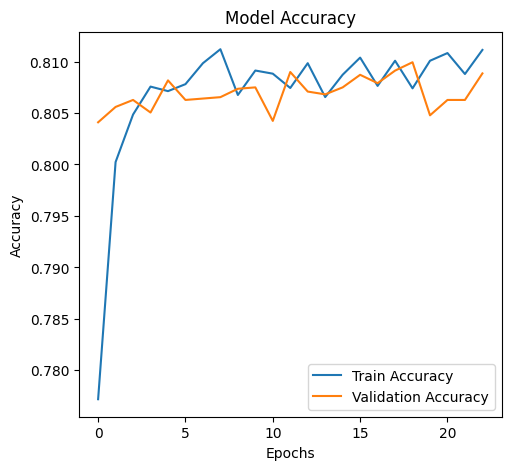

In [21]:
# Neural Network
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = nn_model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2,
                       callbacks=[early_stop], verbose=0)
nn_acc = nn_model.evaluate(X_test, y_test, verbose=0)[1]

print(f"Neural Network Accuracy: {nn_acc:.4f}")

# graph for model accurcy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

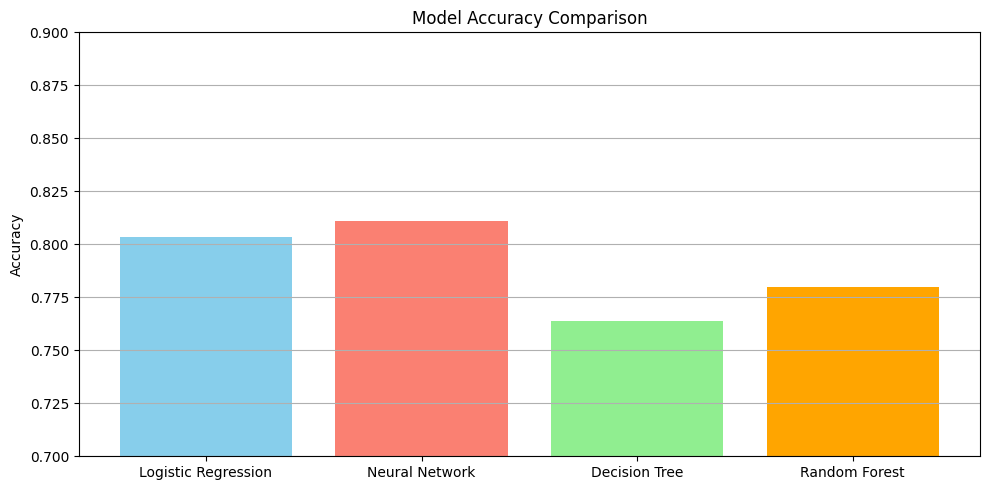

In [22]:
# Accuracy Comparison Plot
models = ['Logistic Regression', 'Neural Network', 'Decision Tree', 'Random Forest']
accuracies = [lr_acc, nn_acc, dt_acc, rf_acc]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.ylabel('Accuracy')
plt.ylim(0.7, 0.9)
plt.title('Model Accuracy Comparison')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [25]:
# Comparing accuracies to find best models
models = {
    "Logistic Regression": (lr_model, lr_acc),
    "Neural Network": (nn_model, nn_acc),
    "Decision Tree": (dt_model, dt_acc),
    "Random Forest": (rf_model, rf_acc)
}
best_model_name = max(models, key=lambda x: models[x][1])
best_model, best_acc = models[best_model_name]

print(f"Best Model: {best_model_name} with accuracy: {best_acc:.4f}")

Best Model: Neural Network with accuracy: 0.8110


In [26]:
# Saving the best model
import joblib

if best_model_name == "Neural Network":
    best_model.save("best_model.h5")
    print("Saved best model as best_model.pk1")
else:
    joblib.dump(best_model, "best_model.pk1")
    print("Saved best model as best_model.pk1")
joblib.dump(scaler, "scaler.pk1")

Saved best model as best_model.pk1


['scaler.pk1']

In [27]:
!pip install streamlit
!pip instal pyngrok

ERROR: unknown command "instal" - maybe you meant "install"


In [32]:
# app.py file for streamlit platform
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
from tensorflow.keras.models import load_model

# Load model and scaler
model = load_model("best_model.h5")
scaler = joblib.load("scaler.pk1")

# Setting titles of page
st.set_page_config(page_title="Employee Salary Classifier", layout="centered")
st.title("Employee Salary Classification")
st.write("Predict whether an employee earns >50K or ≤50K.")

# Sidebar
st.sidebar.header("Input Details")
age = st.sidebar.slider("Age", 18, 70, 30)
hours = st.sidebar.slider("Hours per Week", 1, 100, 40)
gender = st.sidebar.selectbox("Gender", ["Male", "Female"])
education = st.sidebar.selectbox("Education", ["Bachelors", "Masters", "HS-grad", "Some-college", "Assoc", "PhD"])
occupation = st.sidebar.selectbox("Occupation", [
    "Tech-support", "Craft-repair", "Other-service", "Sales", "Exec-managerial",
    "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct", "Adm-clerical",
    "Farming-fishing", "Transport-moving", "Priv-house-serv", "Protective-serv", "Armed-Forces"
])

# Create DataFrame
input_data = pd.DataFrame({
    "age": [age],
    "hours-per-week": [hours],
    "gender": [gender],
    "education": [education],
    "occupation": [occupation]
})

# One-hot encode input
input_encoded = pd.get_dummies(input_data)

# Align columns to match training-time features
train_cols = scaler.feature_names_in_
for col in train_cols:
    if col not in input_encoded:
        input_encoded[col] = 0
input_encoded = input_encoded[train_cols]

# Predict
if st.button("Predict Salary Class"):
    scaled = scaler.transform(input_encoded)
    pred = model.predict(scaled)[0][0]
    result = ">50K" if pred > 0.5 else "≤50K"
    st.success(f"Predicted Income: {result} (Confidence: {pred:.2f})")


Overwriting app.py


In [33]:
!ngrok authtoken 30GYjqI4mIgoGRSPyvzuPUd8DvA_66af5A73bkC3EfSZwHv8g

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [34]:
import os
import threading

def run_streamlit():
  os.system('streamlit run app.py &')

threading.Thread(target=run_streamlit).start()

In [35]:
from pyngrok import ngrok
import time

time.sleep(5)

public_url = ngrok.connect(8501)
print("your Streamlit app is live at :",public_url)

your Streamlit app is live at : NgrokTunnel: "https://49604bcb6b8f.ngrok-free.app" -> "http://localhost:8501"
